In [15]:
import yfinance as yf

# S&P500 指数 (^GSPC) を取得
sp500 = yf.download('^GSPC',
                    start='2018-01-01',
                    end='2022-12-31',   # end は「その日を含まない」扱いなので 12-31 にしておくと安心
                    auto_adjust=False,  # 必要に応じて調整後株価にするなら True
                    progress=False)

print(sp500.head())


Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2018-01-02  2695.810059  2695.810059  2695.889893  2682.360107  2683.729980   
2018-01-03  2713.060059  2713.060059  2714.370117  2697.770020  2697.850098   
2018-01-04  2723.989990  2723.989990  2729.290039  2719.070068  2719.310059   
2018-01-05  2743.149902  2743.149902  2743.449951  2727.919922  2731.330078   
2018-01-08  2747.709961  2747.709961  2748.510010  2737.600098  2742.669922   

Price           Volume  
Ticker           ^GSPC  
Date                    
2018-01-02  3397430000  
2018-01-03  3544030000  
2018-01-04  3697340000  
2018-01-05  3239280000  
2018-01-08  3246160000  


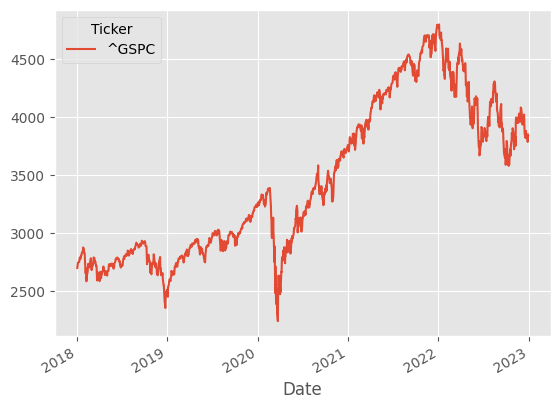

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')    # ← seaborn がなくても必ず存在する

#sp500 = sp500['Close']
sp500['Close'].plot()
plt.show()


C:\Users\flare\AppData\Local\Temp\ipykernel_10668\1080205990.py:8: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500['Close'].resample('BA').mean().plot(style=':')
C:\Users\flare\AppData\Local\Temp\ipykernel_10668\1080205990.py:11: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500['Close'].asfreq('BA').plot(style='--')


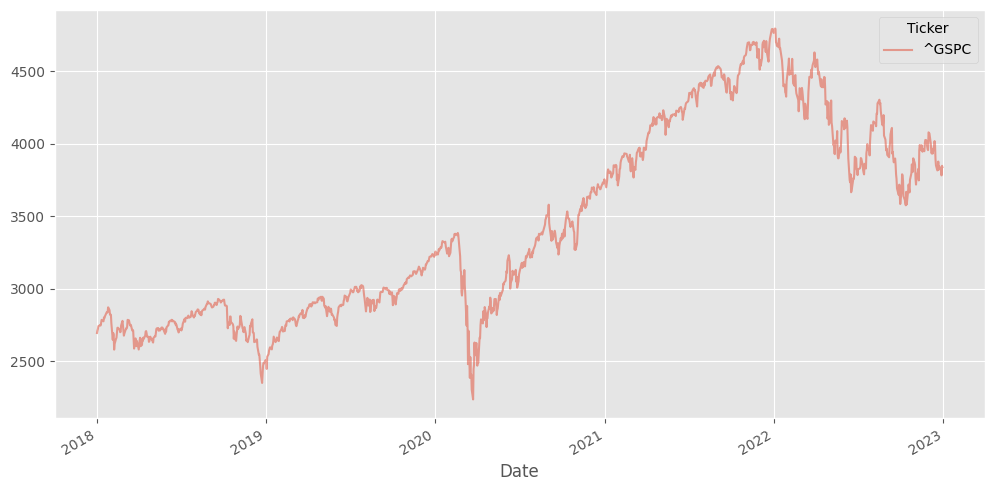

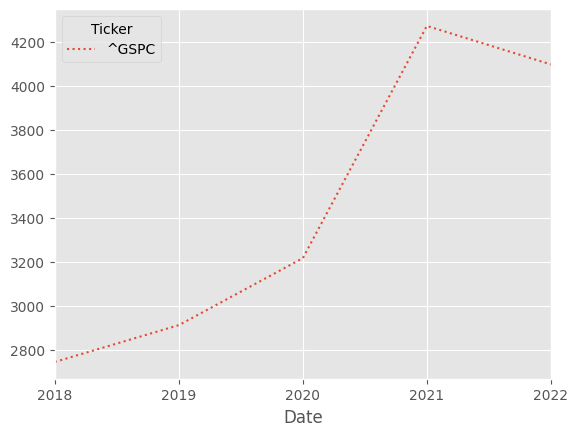

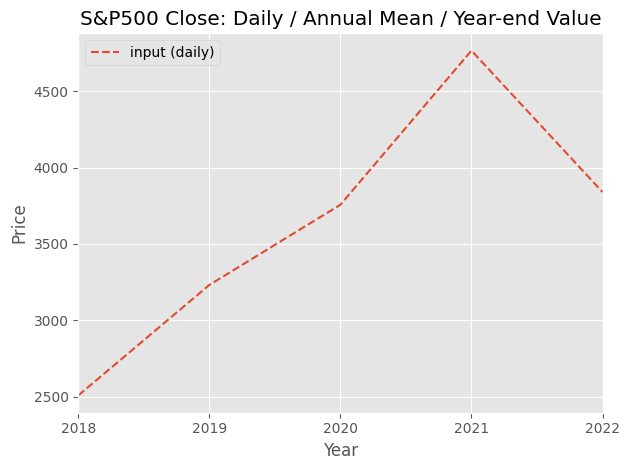

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 1. 元データ（Close）
sp500['Close'].plot(alpha=0.5, style='-', figsize=(12,6))

# 2. 年次平均（BA：年末営業日で集計）
sp500['Close'].resample('BA').mean().plot(style=':')

# 3. 年末営業日の値（asfreq）
sp500['Close'].asfreq('BA').plot(style='--')

plt.legend(['input (daily)', 'resample(annual mean)', 'asfreq(BA)'])
plt.title('S&P500 Close: Daily / Annual Mean / Year-end Value')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


C:\Users\flare\AppData\Local\Temp\ipykernel_10668\2654011151.py:17: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp['Close'].resample('BA').mean().plot(ax=ax, style=':')
C:\Users\flare\AppData\Local\Temp\ipykernel_10668\2654011151.py:20: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp['Close'].asfreq('BA').plot(ax=ax, style='--')


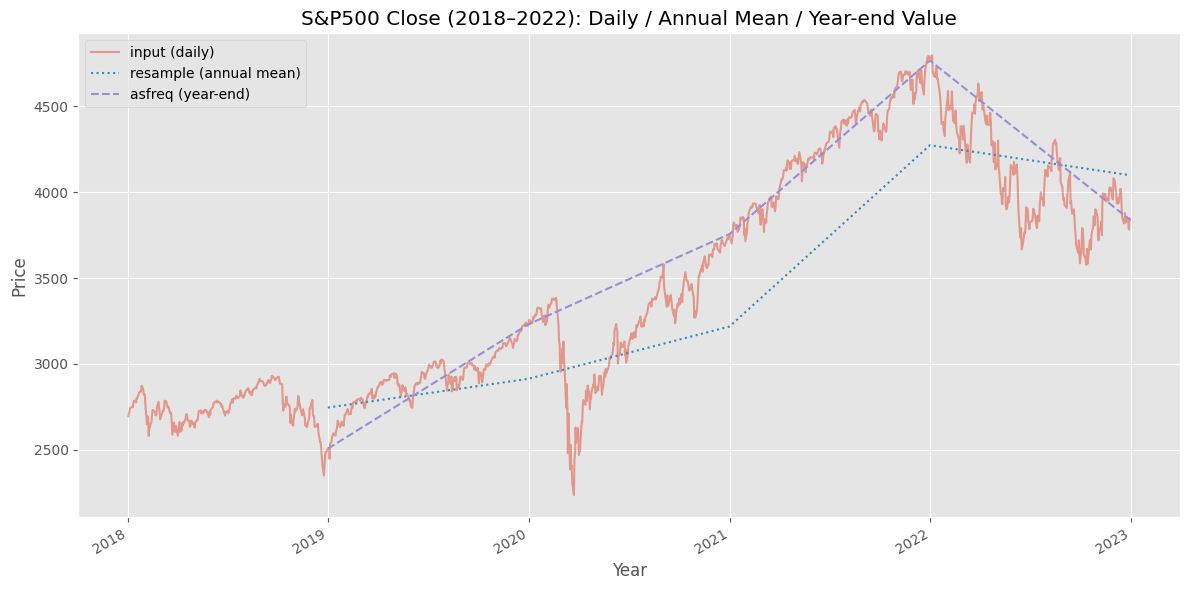

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 0. データを 2022 年末までに制限
sp = sp500.loc[:'2022-12-31']

# 念のため、インデックスを日時型に（もう DatetimeIndex なら不要）
# sp.index = pd.to_datetime(sp.index)

# 1つの図・1つの Axes を用意
fig, ax = plt.subplots(figsize=(12, 6))

# 1. 元データ（Close：日次）
sp['Close'].plot(ax=ax, alpha=0.5, style='-')

# 2. 年次平均（BA：年末営業日区切り）
sp['Close'].resample('BA').mean().plot(ax=ax, style=':')

# 3. 年末営業日の値（asfreq）
sp['Close'].asfreq('BA').plot(ax=ax, style='--')

ax.legend(['input (daily)', 'resample (annual mean)', 'asfreq (year-end)'],
          loc='upper left')
ax.set_title('S&P500 Close (2018–2022): Daily / Annual Mean / Year-end Value')
ax.set_xlabel('Year')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


1. 日次データ（input: daily）— もっとも細かい実際の価格変動

2020 年 3 月のコロナショックで急激に落ち込んでいる
2019 年後半〜2021 年にかけては全体として上昇傾向
2022 年は金利上昇局面の影響で大きく下落

2. 年次平均（annual mean）— トレンドの「滑らかな中心線」

2019→2020→2021 にかけて「なめらかに右肩上がり」
2022 で強く下向きに反転（インフレ＋金融引き締めの影響）

3. 年末営業日 asfreq(BA) — “年末時点”を示す区切り線

2019 年末 → 高値
2020 年末 → コロナショックからの V 字回復後の上昇
2021 年末 → 史上最高付近
2022 年末 → 急落後の低水準


日次のノイズ（灰線）に比べ、年次平均（点線）は滑らかで安定している。
コロナショックが非常に急激で深い下降を示している。
2022 年の年次平均と年末値の低さが、金融引き締めによる下落を強調している。
3 種類を重ねることで、短期・中期・長期の視点が1枚で理解できる。

C:\Users\flare\AppData\Local\Temp\ipykernel_10668\1924854157.py:33: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  nt['Close'].resample('BA').mean().plot(ax=ax, style=':')
C:\Users\flare\AppData\Local\Temp\ipykernel_10668\1924854157.py:36: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  nt['Close'].asfreq('BA').plot(ax=ax, style='--')


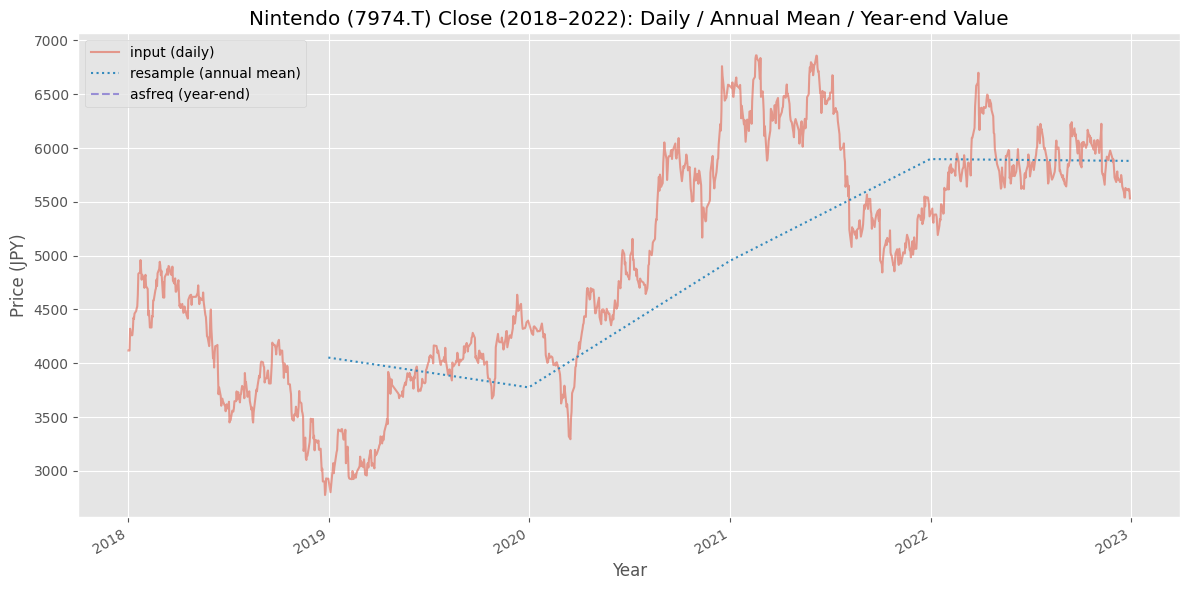

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# -------------------------------------------
# 1. 任天堂データ取得
# -------------------------------------------
nintendo = yf.download(
    '7974.T',
    start='2018-01-01',
    end='2022-12-31',
    auto_adjust=False,
    progress=False
)

nt = nintendo.loc[:'2022-12-31']

# -------------------------------------------
# 2. 描画セットアップ
# -------------------------------------------
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))

# -------------------------------------------
# 3. 日次データ
# -------------------------------------------
nt['Close'].plot(ax=ax, alpha=0.5, style='-')

# -------------------------------------------
# 4. 年次平均
# -------------------------------------------
nt['Close'].resample('BA').mean().plot(ax=ax, style=':')

# -------------------------------------------
# 5. 年末値（asfreq：前日を埋める）
#    method='ffill' がポイント！
# -------------------------------------------
nt['Close'].asfreq('BA', method='ffill').plot(ax=ax, style='--')

# -------------------------------------------
# 6. 仕上げ
# -------------------------------------------
ax.legend([
    'input (daily)',
    'resample (annual mean)',
    'asfreq (year-end)'
])
ax.set_title('Nintendo (7974.T) Close (2018–2022): Daily / Annual Mean / Year-end Value')
ax.set_xlabel('Year')
ax.set_ylabel('Price (JPY)')

plt.tight_layout()
plt.show()


2020〜2021 のコロナ禍での需要拡大（Switch 特需）
2022 の世界的な金利上昇・円安の影響